# Определение перспективного тарифа для телеком компании

Задача: определить наиболее прибыльный тариф.

В ходе проекта нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В наличии данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

*Даже если клиенто проговорил 1 секунду, в тарифе засчитывается минута.

**План проекта:** 

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Подготовьте данные
- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных.
- Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Шаг 3. Проанализируйте данные
- Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. 
- Опишите распределения.

Шаг 4. Проверьте гипотезы:
- **средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;**
- **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;**

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

Шаг 5. Напишите общий вывод

**Описание данных**

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Открыть файлы с данными и изучить общую информацию

In [1]:
#импортирую необходимые бибилиотеки
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
print('Инфо по таблице users:')
print(users.info())
print()
print('Инфо по таблице calls:')
print(calls.info())
print()
print('Инфо по таблице messages:')
print(messages.info())
print()
print('Инфо по таблице internet:')
print(internet.info())
print()
print('Инфо по таблице tariffs:')
print(tariffs.info())

Инфо по таблице users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Инфо по таблице calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

Инфо по таблице messages:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-

In [4]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
display(calls.tail())

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [6]:
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.drop('Unnamed: 0', axis='columns', inplace=True)

In [9]:
print(internet['mb_used'].max())
print(internet['mb_used'].median())
print(internet.sample(10))

1724.83
348.015
              id  mb_used session_date  user_id
29744   1104_161   324.47   2018-07-14     1104
44844    1155_31    57.76   2018-07-26     1155
1717    1006_348   688.08   2018-09-03     1006
20432   1068_182   226.07   2018-11-09     1068
64582   1219_489   154.58   2018-08-30     1219
12323   1043_321   457.25   2018-12-28     1043
97543   1328_100   218.61   2018-10-18     1328
101948   1341_63   558.53   2018-06-28     1341
73270   1247_308   118.98   2018-06-30     1247
78791   1264_410     0.00   2018-11-07     1264


In [10]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод по шагу 1:

Имеем 5 датасетов. Пропусков нет. В таблице users есть 2 строки с датами типа object, которые нужно будет привести к datetime, как и в других таблицах. User_id идут от 1000 до 1499. Строки duration таблицы calls и mb_used таблицы internet имеют тип float. Так как Мегалайн округляет значения трафика и минут в большую сторону до целых чисел, их типы данных можно юужет заменить на int. Также в фрейме с данными о трафике был ненужный столбец "Unnamed".

## Подготавливаю данные

Меняю типы данных:

In [11]:
#ведь Мегалайн округляет все в большую сторону 
# + я немхочу потерять звонки продолжительностью до 50 секунд

calls['duration'] = calls['duration'].apply(np.ceil) 
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [12]:
internet['gb_used'] = internet['mb_used'] / 1024
internet['gb_used'] = internet['gb_used'].apply(np.ceil)

In [13]:
calls['duration'] = calls['duration'].astype(int)
internet['mb_used'] = internet['mb_used'].astype(int)

In [14]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [15]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [16]:
print(calls['duration'].value_counts())

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64


Кажется, у кого-то телефон слишком часто стоит в беззвуке. почти 40 тысяч пропущенных! Жалко отказываться от такого объема данных, но пропущенные вызовы не приносят компании деняг, поэтому придётся попращаться. 

In [17]:
calls = calls.query('duration > 0')

In [18]:
print(internet['mb_used'].value_counts())

0       19598
333       231
382       228
377       224
334       222
        ...  
1495        1
1624        1
1371        1
1423        1
1279        1
Name: mb_used, Length: 1424, dtype: int64


In [19]:
internet = internet.query('gb_used > 0')

In [20]:
print(users['city'].unique())

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']


Ошибок с городами нет. Москва есть Москва, а не МСК/мск. 

In [21]:
print(users.duplicated().sum())
print(calls.duplicated().sum())
print(messages.duplicated().sum())
print(internet.duplicated().sum())

0
0
0
0


Перехожу к расчетам новых столбцов по каждому пользователю. 
Звонки, минуты и трафик по месяцам:

In [22]:
calls['month_of'] = calls['call_date'].dt.month
messages['month_of'] = messages['message_date'].dt.month
internet['month_of'] = internet['session_date'].dt.month

In [23]:
calls_count = calls.pivot_table(index=
                                ['user_id', 'month_of'], values='duration', 
                                aggfunc=['count', 'sum']).rename(columns={'duration': 'total_calls'})
calls_count.reset_index()
calls_count

count         sum
                 total_calls total_calls
user_id month_of                        
1000    5                 17         159
        6                 28         172
        7                 41         340
        8                 42         408
        9                 46         466
...                      ...         ...
1498    10                30         247
1499    9                  8          70
        10                44         449
        11                62         612
        12                56         492

[3168 rows x 2 columns]

In [24]:
messages_count = messages.pivot_table(index=['user_id', 'month_of'], values='id', aggfunc=['count'])
messages_count.columns = ['total_messages']
messages_count.reset_index()
messages_count

total_messages
user_id month_of                
1000    5                     22
        6                     60
        7                     75
        8                     81
        9                     57
...                          ...
1498    10                    42
1499    9                     11
        10                    48
        11                    59
        12                    66

[2717 rows x 1 columns]

In [25]:
gb_count = internet.pivot_table(index=['user_id', 'month_of'], values='gb_used', aggfunc=['sum'])
gb_count.columns = ['total_gb']
gb_count.reset_index()
gb_count

total_gb
user_id month_of          
1000    5              4.0
        6             49.0
        7             28.0
        8             27.0
        9             26.0
...                    ...
1498    10            50.0
1499    9              5.0
        10            44.0
        11            41.0
        12            40.0

[3201 rows x 1 columns]

Посчитаем, сколько Мегалайн зарабатывает (или теряет) на тарифах: 

In [26]:
#делаю фреймы для будующего использования .merge (ну или .join)
calls_count = pd.DataFrame(calls_count.to_records())
messages_data = pd.DataFrame(messages_count.to_records())
gb_data = pd.DataFrame(gb_count.to_records())

In [27]:
#делаю ещё один фрейм для подсчёта прибыли:
month_income = pd.DataFrame()
month_income['user_id'] = calls_count['user_id']
month_income['month_of']   = calls_count['month_of']
month_income['calls']   = calls_count.iloc[:, 2]
month_income['minutes'] = calls_count.iloc[:, 3]

In [28]:
month_income = month_income.merge(messages_data, on=['user_id', 'month_of'], how='outer')
month_income = month_income.merge(gb_data, on=['user_id', 'month_of'], how='outer')
month_income

,user_id,month_of,calls,minutes,total_messages,total_gb
0,1000,5,17.0,159.0,22.0,4.0
1,1000,6,28.0,172.0,60.0,49.0
2,1000,7,41.0,340.0,75.0,28.0
3,1000,8,42.0,408.0,81.0,27.0
4,1000,9,46.0,466.0,57.0,26.0
...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,52.0
3210,1489,11,NaN,NaN,20.0,46.0
3211,1489,12,NaN,NaN,35.0,45.0
3212,1240,2,NaN,NaN,NaN,3.0


Вижу много NaN == меняю на нули. Похоже, так получилось при мердже из-за того, что в какие-то месяца клиент только звонил или только отправлял сообщения. 

In [29]:
#добавим столбцы в таблицу: 
tariff_and_id = pd.DataFrame()
tariff_and_id[['user_id','tariff', 'city']] = users[['user_id','tariff', 'city']]

month_income = month_income.merge(tariff_and_id, on='user_id', how='outer')
month_income.columns = ['user_id','month_of','calls', 'minutes', 'messages', 'gb', 'tariff', 'city']
month_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
user_id     3216 non-null int64
month_of    3214 non-null float64
calls       3168 non-null float64
minutes     3168 non-null float64
messages    2717 non-null float64
gb          3201 non-null float64
tariff      3216 non-null object
city        3216 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 226.1+ KB


In [30]:
month_income = month_income.fillna(0.0)
month_income.isnull().sum()

user_id     0
month_of    0
calls       0
minutes     0
messages    0
gb          0
tariff      0
city        0
dtype: int64

У рассчитанных показателей получился тип данныех float. Заменю на int:

In [31]:
month_income['month_of'] = month_income['month_of'].astype(int)
month_income['calls'] = month_income['calls'].astype(int)
month_income['minutes'] = month_income['minutes'].astype(int)
month_income['gb'] = month_income['gb'].astype(int)
month_income['messages'] = month_income['messages'].astype(int)

Для дальнейшего расчёта нужно объявить переменные по тарифу: 

In [32]:
smart_price = 550
smart_minutes = 500
smart_messages = 50
smart_gb = 15 

smart_price_for_minute = 3
smart_price_for_message = 3
smart_price_for_gb = 200

ultra_price = 1950
ultra_minutes = 3000
ultra_messages = 1000
ultra_gb = 30

ultra_price_for_minute = 1
ultra_price_for_message = 1
ultra_price_for_gb = 150

А теперь, кажется, пришёл черёд большой и страшной функции 0___0

In [33]:
def profit(row):
    gb = row['gb']
    tariff = row['tariff']
    minutes = row['minutes']
    messages = row['messages']
    total_gb = 0
    total_messages = 0 
    total_minutes = 0
    
    if tariff == 'smart':
        if gb > 0:
            total_gb = (gb - smart_gb) * smart_price_for_gb 
        if minutes > smart_minutes:
            total_minutes = (minutes - smart_minutes) * smart_price_for_minute
        if messages > smart_messages:
            total_messages = (messages - smart_messages) * smart_price_for_message
        
        return total_gb + total_minutes + total_messages + smart_price
    
    if tariff == 'ultra':
        if gb > 0:
            total_gb = (gb - ultra_gb) * ultra_price_for_gb
        if minutes > ultra_minutes:
            total_minutes = (minutes - ultra_minutes) * ultra_price_for_minute
        if messages > ultra_messages:
            total_messages = (messages - ultra_messages) * ultra_price_for_message
        return total_gb + total_minutes + total_messages + ultra_price

In [34]:
#Применяю функцию к фрейму: 
month_income['profit'] = month_income.apply(profit, axis=1)
month_income

,user_id,month_of,calls,minutes,messages,gb,tariff,city,profit
0,1000,5,17,159,22,4,ultra,Краснодар,-1950
1,1000,6,28,172,60,49,ultra,Краснодар,4800
2,1000,7,41,340,75,28,ultra,Краснодар,1650
3,1000,8,42,408,81,27,ultra,Краснодар,1500
4,1000,9,46,466,57,26,ultra,Краснодар,1350
...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,21,52,smart,Санкт-Петербург,7950
3212,1489,11,0,0,20,46,smart,Санкт-Петербург,6750
3213,1489,12,0,0,35,45,smart,Санкт-Петербург,6550
3214,1128,0,0,0,0,0,ultra,Волжский,1950


### Вывод по шагу 2

Округлил данные по звонкам и трафику в большую строну, как это делает Мегалайн. Привёл все даты к формату datetime. Отбросил пропущенные вызовы, потому что за них компания не получает прибыли и они не учитываются в тарифе. Нашёл для каждого клиента данные о числе и продолжительности звонков, сообщениях и трафике по месяцам. Снова привёл данные к нужным типам и посчитал для каждого клиента в каждом месяце профит. 

Фрейм готов для дальнейшего анализа. 

##  Проанализировать данные

Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

In [35]:
#Сделаю выборки клиентов по тарифам: 

smart_users = month_income.query('tariff == "smart"')
ultra_users = month_income.query('tariff == "ultra"')

In [36]:
#Для тарифа Smart:
for column in smart_users[['minutes','messages','gb','profit']]:
    print('Среднее {}: {:.0f}'.format(column,smart_users[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,smart_users[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(smart_users[column])))
    print('Стандартное отклонение {}: {:.0f} \n'.format(column, np.std(smart_users[column])))

Среднее minutes: 418
Медиана minutes: 422
Дисперсия minutes: 36265
Стандартное отклонение minutes: 190 

Среднее messages: 33
Медиана messages: 28
Дисперсия messages: 797
Стандартное отклонение messages: 28 

Среднее gb: 42
Медиана gb: 43
Дисперсия gb: 224
Стандартное отклонение gb: 15 

Среднее profit: 6176
Медиана profit: 6350
Дисперсия profit: 9283276
Стандартное отклонение profit: 3047 



In [37]:
#Для тарифа Ультра:
for column in ultra_users[['minutes','messages','gb','profit']]:    
    print('Среднее {}: {:.0f}'.format(column,ultra_users[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,ultra_users[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(ultra_users[column])))
    print('Стандартное отклонение {}: {:.0f} \n'.format(column, np.std(ultra_users[column])))

Среднее minutes: 526
Медиана minutes: 518
Дисперсия minutes: 100950
Стандартное отклонение minutes: 318 

Среднее messages: 49
Медиана messages: 38
Дисперсия messages: 2283
Стандартное отклонение messages: 48 

Среднее gb: 38
Медиана gb: 38
Дисперсия gb: 383
Стандартное отклонение gb: 20 

Среднее profit: 3224
Медиана profit: 3150
Дисперсия profit: 8245233
Стандартное отклонение profit: 2871 



Время строить гистрограммы

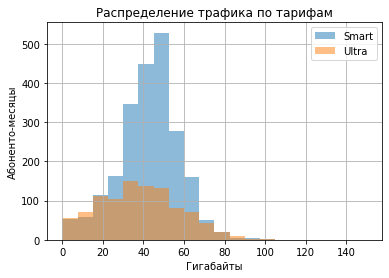

In [38]:
#Распределение трафика по тарифам:
smart_users['gb'].hist(range=(0, 150), bins = 20, alpha = .50)
ultra_users['gb'].hist(range=(0, 150), bins = 20, alpha = .50)
plt.title('Распределение трафика по тарифам')
plt.xlabel('Гигабайты')
plt.ylabel('Абоненто-месяцы')
plt.legend(['Smart', 'Ultra'])
plt.show()

График имеет вид распределения Пуассона, стремящегося к нормальному. График тарифа Ultra больше тяготеет влево, что говорит о более экономном расходовании интернет трафика этими абонентами. 

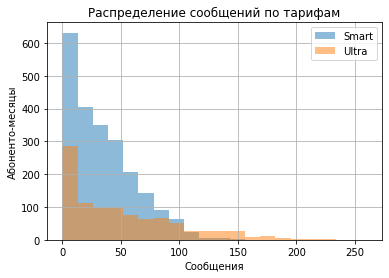

In [39]:
#Распределение сообщений по тарифам:
smart_users['messages'].hist(range=(0, 260), bins = 20, alpha = .50)
ultra_users['messages'].hist(range=(0, 260), bins = 20, alpha = .50)
plt.title('Распределение сообщений по тарифам')
plt.xlabel('Сообщения')
plt.ylabel('Абоненто-месяцы')
plt.legend(['Smart', 'Ultra'])
plt.show()

Снова Пуассон. На этот раз хвост справа у тарифа Ultra . Видимо, среди пользователей более дорогого тарифа больше любителей архаичных смс, нежеле мессенджеров.
Характер схож, но у Ultra сильнее выделяется группа абоненотов, не выходящих за 10 сообщений в месяц, по сравнению с остальными данными. 

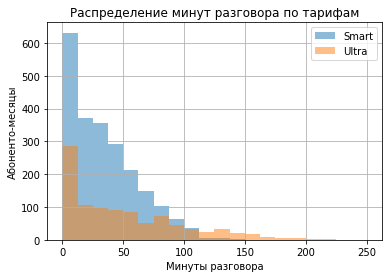

In [40]:
#Распределение минут разговора по тарифам:
smart_users['messages'].hist(range=(0, 250), bins = 20, alpha = .50)
ultra_users['messages'].hist(range=(0, 250), bins = 20, alpha = .50)
plt.title('Распределение минут разговора по тарифам')
plt.xlabel('Минуты разговора')
plt.ylabel('Абоненто-месяцы')
plt.legend(['Smart', 'Ultra'])
plt.show()

Пуассон. Снова хвост у Ultra. Более дорогие абоненты не зря платят за обслуживание, они и наговаривают по телефону больше. У Ultra снова видно сильнее разницу абонентов, не отправляющих более 10 смс в месяц. 

Посмотрим на статистику тарифов: 

In [41]:
smart_users_count = (users['tariff'] == 'smart').sum()
ultra_users_count = (users['tariff'] == 'ultra').sum()

print('число абонентов Smart:', smart_users_count)
print('число абонентов Ultra:', ultra_users_count)

число абонентов Smart: 351
число абонентов Ultra: 149


In [42]:
print('Годовая выручка от Smart:', smart_users['profit'].sum())
print('Годовая выручка от Ultra:', ultra_users['profit'].sum())

Годовая выручка от Smart: 13772501
Годовая выручка от Ultra: 3178500


In [43]:
#Посчитаю сколько минут, сообщений и трафика нужно пользователям тарифа Smart в месяц:
smart_pivot = smart_users.pivot_table(index='month_of', values=['minutes','messages','gb','profit'], aggfunc='sum')
smart_stat = pd.DataFrame(smart_pivot.to_records())
smart_stat

,month_of,gb,messages,minutes,profit
0,0,0,0,0,550
1,1,733,620,6931,63525
2,2,1726,1397,17324,206001
3,3,3070,2453,30034,434476
4,4,3976,3443,41119,531066
5,5,5810,4762,54618,830449
6,6,6748,5478,64885,965059
7,7,8344,6784,82079,1200614
8,8,10199,7905,99045,1500140
9,9,11117,8746,111439,1624386


In [44]:
#Посчитаю сколько минут, сообщений и трафика нужно пользователям тарифа Ultra в месяц:
ultra_pivot = ultra_users.pivot_table(index='month_of', values=['minutes','messages','gb','profit'], aggfunc='sum')
ultra_stat = pd.DataFrame(ultra_pivot.to_records())
ultra_stat

,month_of,gb,messages,minutes,profit
0,0,0,0,0,1950
1,1,245,304,3853,13800
2,2,574,527,7131,33900
3,3,1267,1195,18117,95700
4,4,1826,1736,25191,133650
5,5,2557,2536,34192,221700
6,6,3111,3505,40295,256950
7,7,3668,4536,49667,322650
8,8,4078,5183,54653,343350
9,9,4334,6013,62036,361350


In [45]:
month_income

,user_id,month_of,calls,minutes,messages,gb,tariff,city,profit
0,1000,5,17,159,22,4,ultra,Краснодар,-1950
1,1000,6,28,172,60,49,ultra,Краснодар,4800
2,1000,7,41,340,75,28,ultra,Краснодар,1650
3,1000,8,42,408,81,27,ultra,Краснодар,1500
4,1000,9,46,466,57,26,ultra,Краснодар,1350
...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,21,52,smart,Санкт-Петербург,7950
3212,1489,11,0,0,20,46,smart,Санкт-Петербург,6750
3213,1489,12,0,0,35,45,smart,Санкт-Петербург,6550
3214,1128,0,0,0,0,0,ultra,Волжский,1950


In [46]:
mean_profit_by_smart_user = smart_users['profit'].groupby(smart_users['user_id']).mean()
mean_profit_by_ultra_user = ultra_users['profit'].groupby(ultra_users['user_id']).mean()

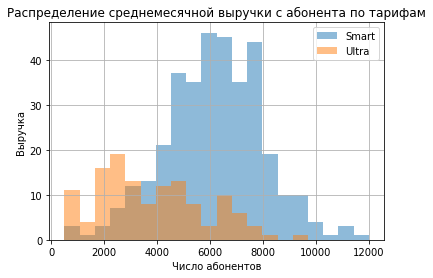

In [47]:
mean_profit_by_smart_user.hist(range=(500, 12000), bins = 20, alpha = .50)
mean_profit_by_ultra_user.hist(range=(500, 12000), bins = 20, alpha = .50)
plt.title('Распределение среднемесячной выручки с абонента по тарифам')
plt.xlabel('Число абонентов')
plt.ylabel('Выручка')
plt.legend(['Smart', 'Ultra'])
plt.show()

Среди абонентов Smart чаще встречаются те, кто выходит за лимиты тарифа. Они же в среднем больше платят за связь, чем абоненты Ultra.

### Вывод по шагу 3

Нашёл средние и медианные значения для сообщений, звонков и трафика по месяцам для каждого тарифа. 
Абонентов с тарифом Smart почти в 2 раза больше, а выручки они генерируют почти в 5 раз больше, чем абоненты с Ultra. Скорее всего это связано с более частым выходом за лимиты. 

Для граффиков трафика, сообщений и звонков по месяцам характерно нормальное распределение. У звонков и сообщений есть заметные хвосты справа по тарифу Ultra. Это говорит о том, что обладатели этого тарифа не даром платят абоненствую плату -- они действительно много разговаривают и отправляют много смс. 

Стандартные отклонения имеют заметные отличия касательно сообщений и минут разговора. Это вызвано бОльшим разбросом данных у абонентов с Ultra. Похоже, часть из них платит за более дорогой тариф просто из-за престижа, а какой-то части -- даже расширенных условий мало и они сильно выходят за лимиты.


## Проверить гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Гипотеза H₀: Средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" равны.

Альтернативная гипотеза: Средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт".  

In [48]:
smart_by_month = smart_users['profit']
ultra_by_month = ultra_users['profit']

In [49]:
print(len(smart_by_month))
print()
print(len(ultra_by_month))

2230

986


In [50]:
alpha = .05
    
results = st.ttest_ind(
    smart_by_month, 
    ultra_by_month, equal_var = False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.0931951855934006e-131
Отвергаем нулевую гипотезу


In [51]:
smart_var = np.var(smart_by_month)
ultra_var= np.var(ultra_by_month)

In [52]:
equal = smart_var / ultra_var
equal

1.1258962066393117

<div class="alert alert-info" role="alert">
Дисперсии отличаются на 12%, это больше 5%, поэтому считаем, что они не равны.
   
</div>

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Гипотеза H₀: Средняя выручка москвичей и выручка абонентов из других регионов равны.  
Альтернативная гипотеза: Средняя выручка москвичей не равна выручке абонентов из других регионов.

In [53]:
#Делаю срезы данных по жителям Москвы и других регионов: 
moscow_users = month_income.query('city == "Москва"')
other_cities_users = month_income.query('city != "Москва"')

moscow_profit = moscow_users['profit']
other_cities_profit = other_cities_users['profit']

In [54]:
print(moscow_profit.mean())
print()
print(other_cities_profit.mean())

5154.324058919804

5298.160844529751


In [55]:
alpha = .05

results = st.ttest_ind(moscow_profit, other_cities_profit, equal_var = False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3072164663792247
Не получилось отвергнуть нулевую гипотезу


In [56]:
moscow_var = np.var(moscow_profit)
other_var= np.var(other_cities_profit)

In [57]:
equal_2 = other_var / moscow_var
equal_2

1.1730388793902393

Нулевые гипотезы сформулировал по условию, альтернативные им - как противоположный вариант подтверждения нулевых гипотез. 

В результате проверок получилось, что нулевые гипотезы не подтвердились. Получается, что средняя выручка москвичей и выручка абонентов из других регионов равны. Аргументу equal_var передал значение False, так как гипотеза предполагает, что совокумности не схожи по параментрам. 

Проверял гипотезы методом st.ttest_ind, так как размеры массивов совокупностей не равны и не являются зависимыми. 

## Общий вывод:

Абонентов с тарифом Smart почти в 2 раза больше (351 против 149), но выручки они генерируют почти в 5 раз больше (13 700 000 рублей протип 3 200 000), чем абоненты с Ultra. Скорее всего это связано с более частым выходом за лимиты. Это же подтверждается графиком распределения среднемесячной выручки. 

Для граффиков трафика, сообщений и звонков по месяцам характерно нормальное распределение. У звонков и сообщений есть заметные хвосты справа по тарифу Ultra. Это говорит о том, что обладатели этого тарифа не даром платят абоненствую плату -- они действительно много разговаривают и отправляют много смс.

Стандартные отклонения имеют заметные отличия касательно сообщений и минут разговора. Это вызвано бОльшим разбросом данных у абонентов с Ultra. Похоже, часть из них платит за более дорогой тариф просто из-за престижа, а какой-то части -- даже расширенных условий мало и они сильно выходят за лимиты.

По предложенным гипотезам сформулировал нулевые и альтернативные. Проверка методом st.ttest_ind в обоих случаях отвергла нулевую гипотезу, что позволяет сделать 2 заключения: 
- Средняя выручка москвичей не равна выручке абонентов из других регионов.
- Средняя выручка по пользователям тарифа "Ультра" не равна средней выручке по пользователям тарифа "Смарт".

Подводя итог, можно сказать, что для большинства клиентов тариф Ultra будет лучше. Он позволит реже выходить за пределы лимитов, а соответственно - платить меньше.
